## NYC Airbnb Analysis, by : Vanya Goel and Abhyank Panwar

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [5]:
# Importing the dataset
df = pd.read_csv('/Users/vanyagoel/Desktop/Rutgers Academics/Data Visualization/AB_NYC_2019.csv')
df.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Checking for null values 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

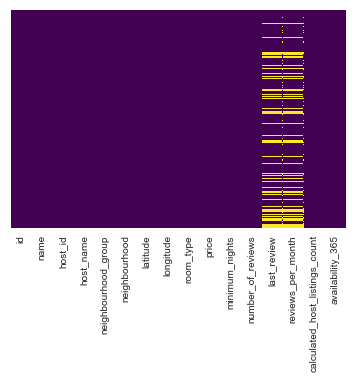

In [6]:
# missing data visulization
sns.heatmap(df.isnull(),yticklabels= False, cbar=False, cmap='viridis')

In [7]:
# Drop 'name','host_name' and 'last_review' because they are irrelevant and insignificant for our analysis
df.drop(['name', 'host_name','last_review'], axis=1, inplace=True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
df[df['number_of_reviews']== 0.0].head(20)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
19,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
26,8700,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
36,11452,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
38,11943,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
193,51438,236421,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,2,0
204,54466,253385,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaN,1,365
260,63588,295128,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,7,349
265,63913,312288,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaN,2,323
267,64015,146944,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,1,0


As we can see from above analysis that, reviews_per_month have NaN values where no reviews were given in the first place. So, we will replace NaN values in reviews_per_month by 0. 

In [9]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
# Examining unique Categorical values
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [11]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

## Data Visualization

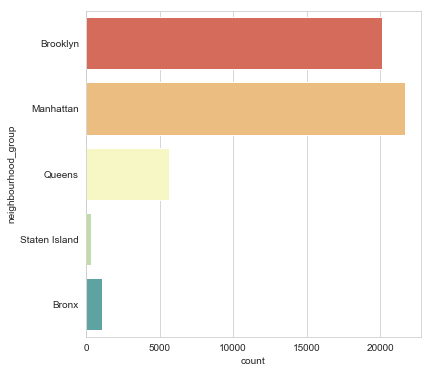

In [13]:
# Most Popular Neighbourhood groups
plt.figure(figsize=(6,6))
sns.countplot(y='neighbourhood_group', data=df, palette='Spectral')

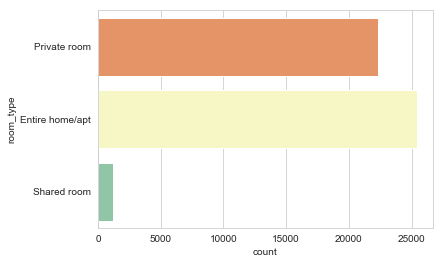

In [14]:
# Most occupied rooms 
#plt.figure(figsize=(6,6))
sns.countplot(y='room_type', data=df, palette='Spectral')

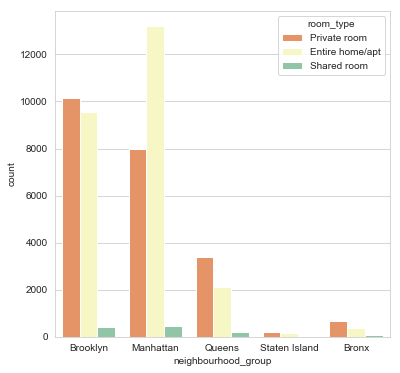

In [15]:
# Room type distribution in the Neighbourhood groups
plt.figure(figsize=(6,6))
sns.countplot(x='neighbourhood_group', hue= 'room_type', data=df, palette='Spectral')

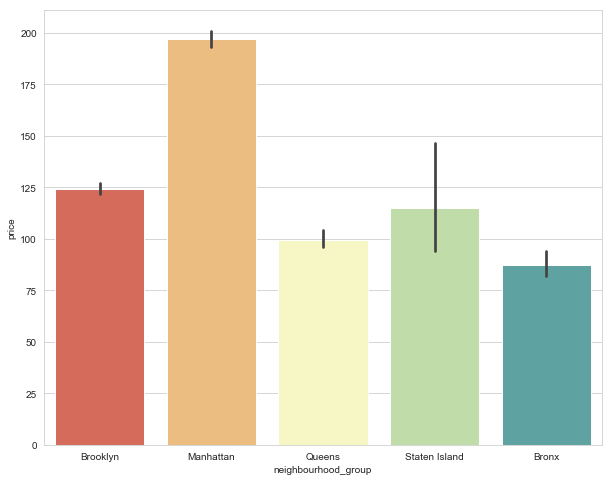

In [16]:
# Pricing Analysis on the basis of neighbourhood_group
plt.figure(figsize=(10,8))
sns.barplot(x='neighbourhood_group',y='price', data=df, palette='Spectral')

Text(0, 0.5, 'frequency')

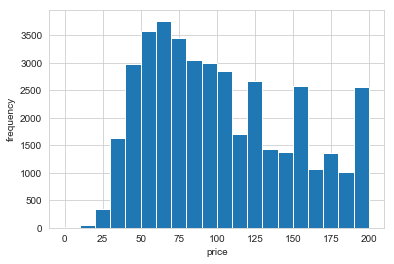

In [17]:
# From above barplot we can see that most of the prices lie below $200, we analyse their frequencies using histogram 
df = df[df['price'] <= 200]
df['price'].hist(bins=20)
plt.xlabel('price')
plt.ylabel('frequency')


Hence, we can see that prices of most of the rooms are between 50-100$

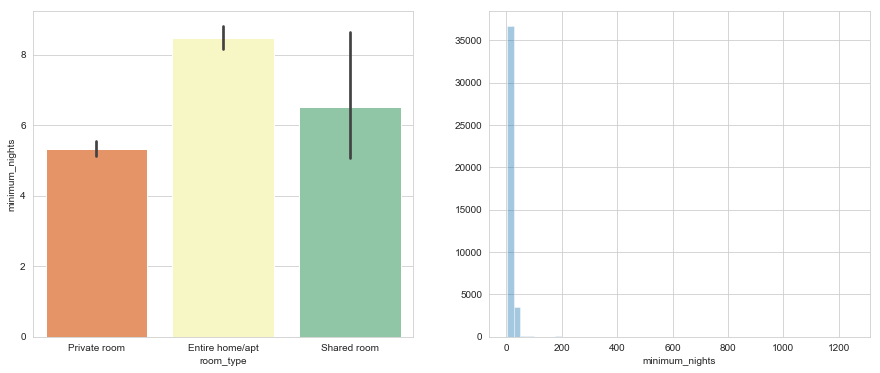

In [18]:
# Analysis of Minimum number of nights stayed 
fig, axes = plt.subplots(1,2, figsize=(15, 6))
sns.barplot(x='room_type',y='minimum_nights',data=df, palette='Spectral',ax = axes[0])
sns.distplot(df['minimum_nights'],kde=False, ax = axes[1])

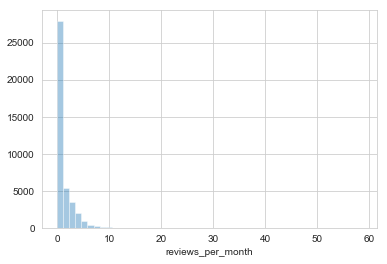

In [19]:
# Reviews per month
sns.distplot(df['reviews_per_month'],kde=False)

The distribution of the number of reviews per month is highly skewed because of the larger weight on smaller numbers that is, there are a lot of properties which only get a few reviews and rather small number of properties which get a lot of reviews.
One explanation would be that the properties which are available for a larger fraction of the year are reviewed more by the people. However, a scatter plot of reviews_per_month and availability_365 variables does not validate the above claim.

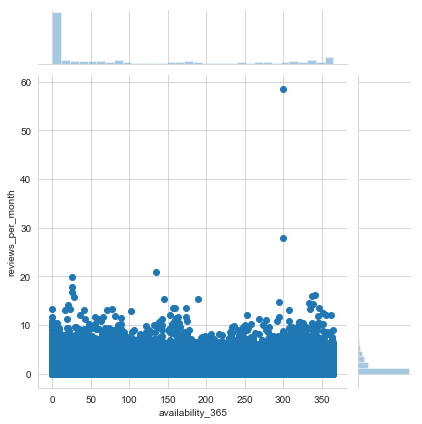

In [20]:
sns.jointplot(x= df['availability_365'], y=df['reviews_per_month'])

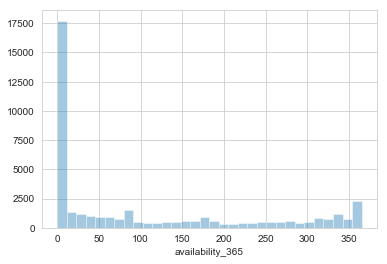

In [21]:
# Availability_365
sns.distplot(df['availability_365'], kde=False)

The above distribution is highly skewed towards the low and the high end. The dataset contains a huge number of properties that are available only for a few days every year, and a small number that are available throughout the year.

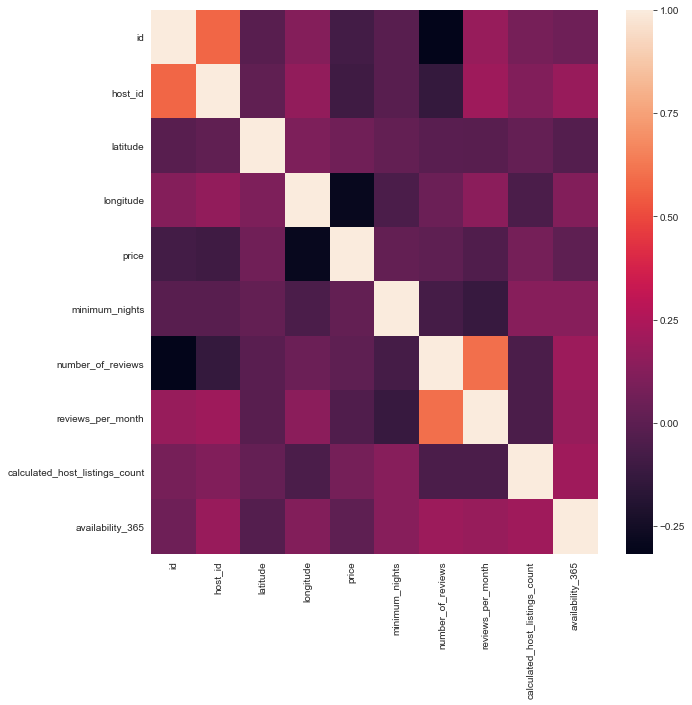

In [22]:
# Analysing Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

From the above heatmap, we can infer that there is not strong correlations between these variables.However, the number of reviews each month is fairly correlated with total number of reviews and the total number of reviews is correlated (25-30%) with the availability of the property.

It's also interesting to see that the longitude is negatively correlated (around 20%) with the price, which makes sense as properties in Bronx and Queens are much cheaper than Manhattan and Brooklyn.

### Analysis by Host

Text(0,0.5,'')

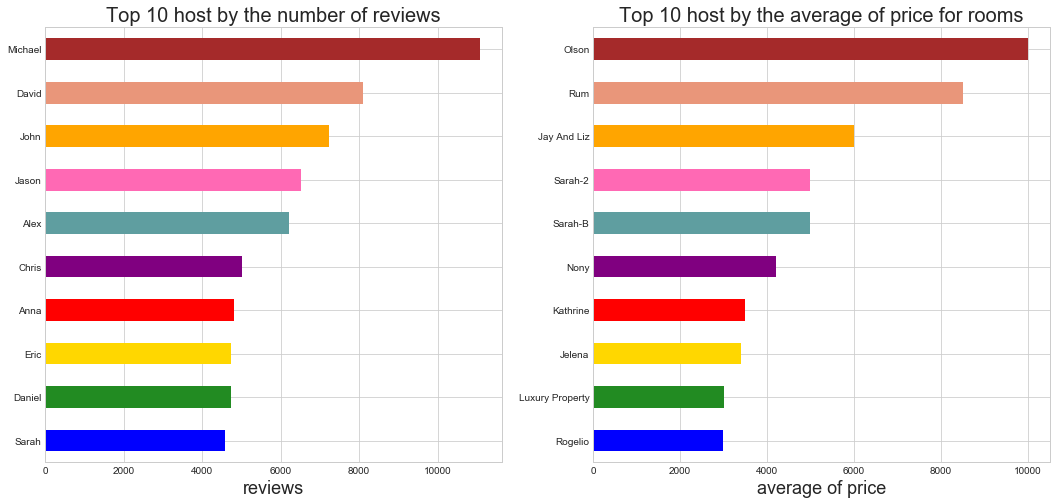

In [7]:
df1 = pd.read_csv('/Users/vanyagoel/Desktop/Rutgers Academics/Data Visualization/AB_NYC_2019.csv')

fig,ax=plt.subplots(1,2,figsize=(18,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df1.groupby(['host_name'])['number_of_reviews'].agg('sum').sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 host by the number of reviews",size=20)
ax[0].set_xlabel('reviews',size=18)
ax[0].set_ylabel('')

df1.groupby(['host_name'])['price'].agg('mean').sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[1])
ax[1].set_title("Top 10 host by the average of price for rooms",size=20)
ax[1].set_xlabel('average of price',size=18)
ax[1].set_ylabel('')

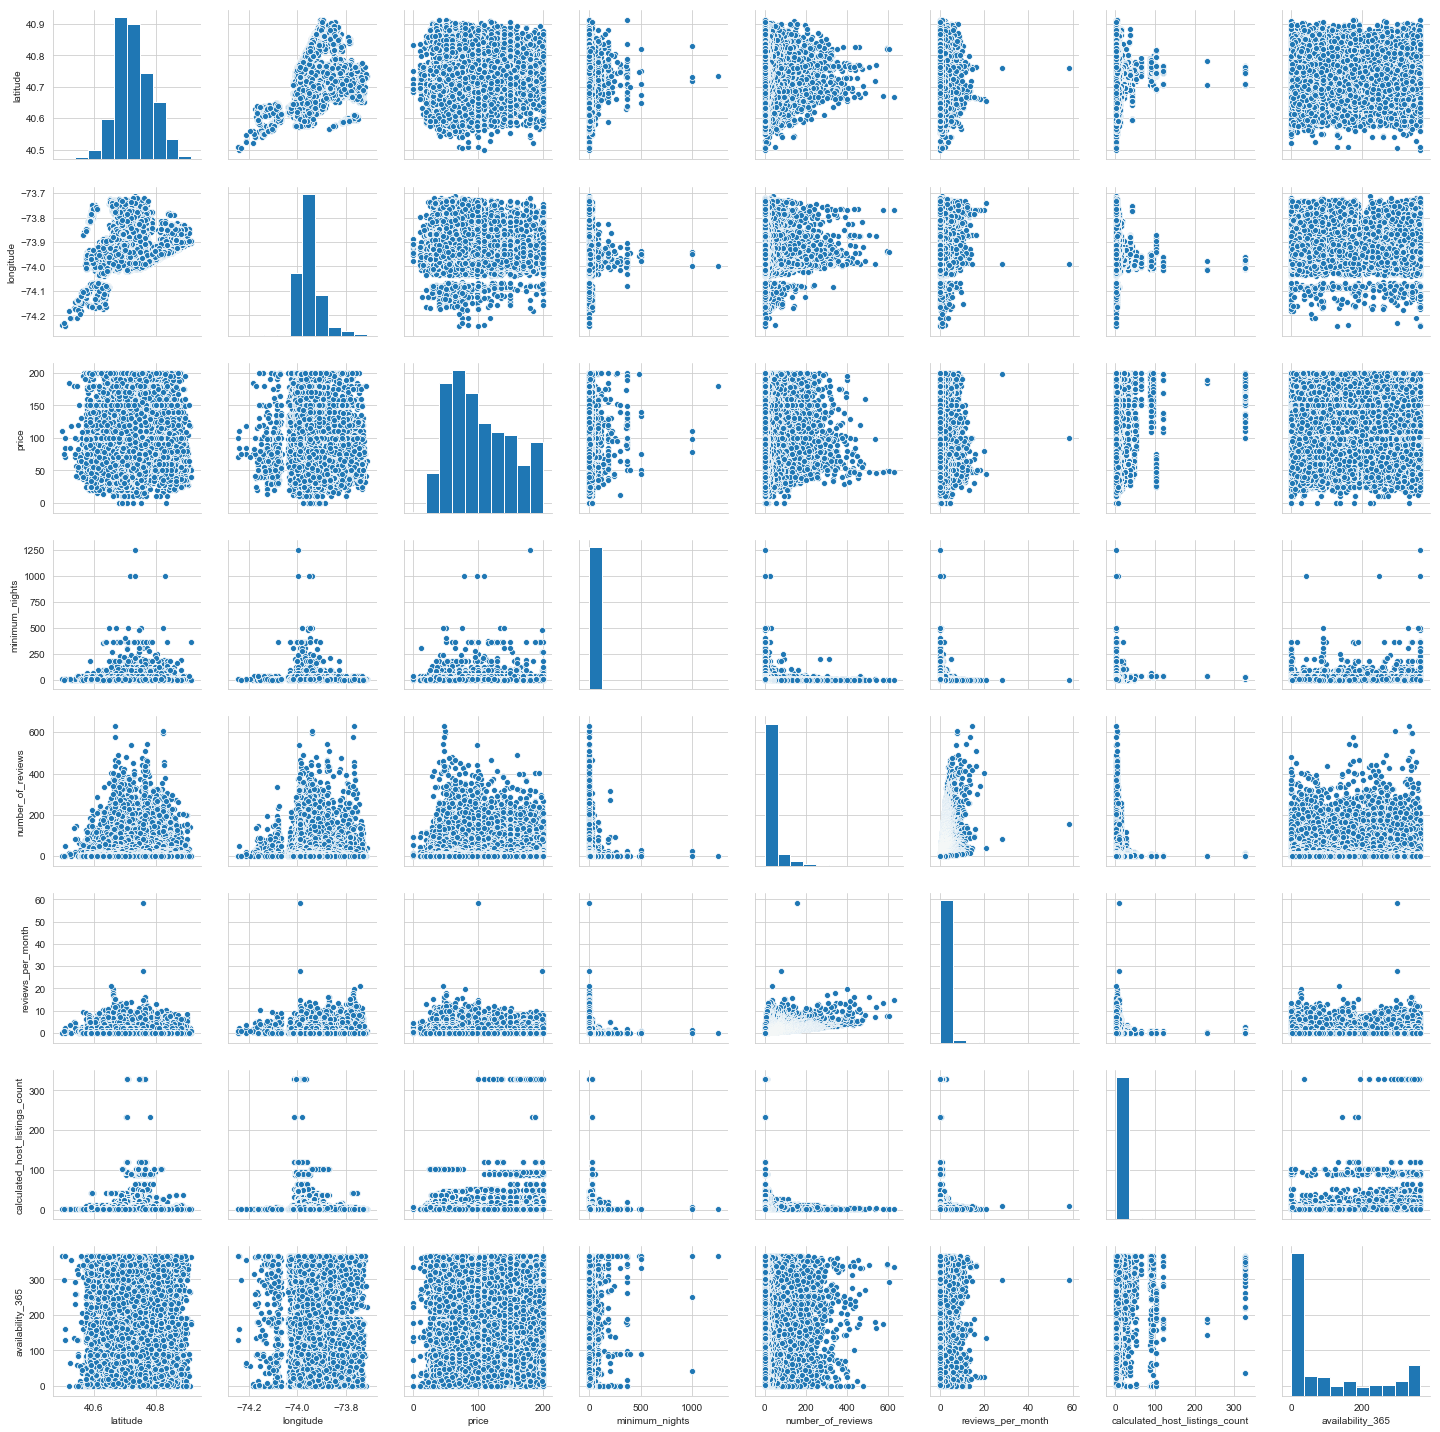

In [23]:
sns.pairplot(df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']])

## Encoding Categorical Features 

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['neighbourhood_group']=labelencoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood']=labelencoder.fit_transform(df['neighbourhood'])
df['room_type']=labelencoder.fit_transform(df['room_type'])
#df.head()

## Price Prediction Using Linear Regression Model

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [26]:
X = df[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [28]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
predict = lm.predict(X_test)

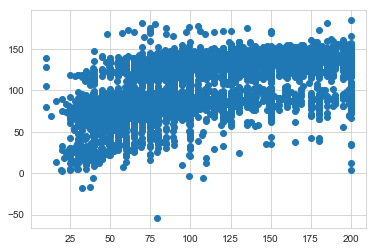

In [30]:
# Scatterplot between y_test and predicted values
plt.scatter(y_test,predict)

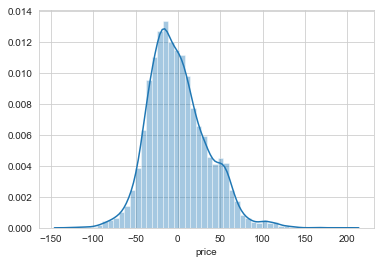

In [31]:
# Residual Plot
sns.distplot((y_test-predict))

Here, the histogram of residuals looks normally distributed, which further validates that the linear regression model correctly fits the data. 

Text(0.5, 1.0, 'Linear Model Predictions')

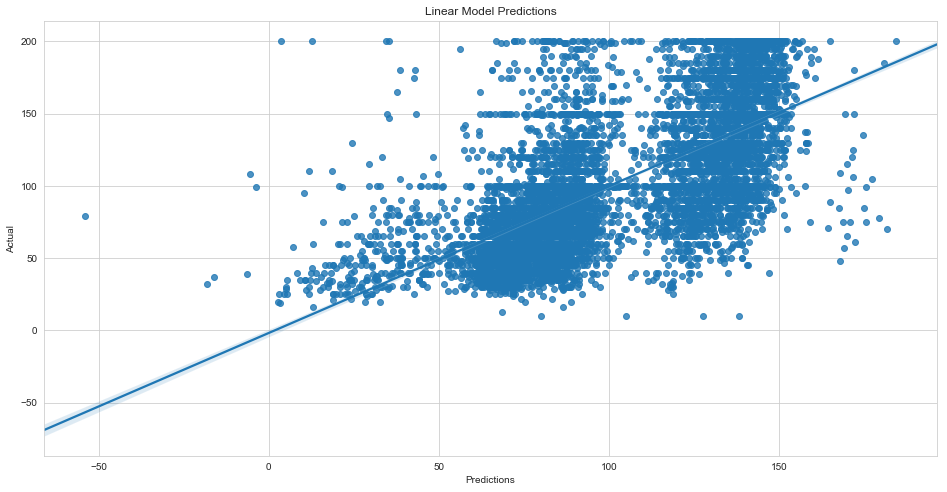

In [32]:
# Regression plot of Predicted vs Actual values
plt.figure(figsize=(16,8))
sns.regplot(predict,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Linear Model Predictions')

## Regression Evaluation Metrices 


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_absolute_error(y_test, predict))
print(r2_score(y_test, predict))

27.300221061271113
0.4639497522790642


In [34]:
mean_squared_error(y_test, predict)

1211.7922959723048

In [35]:
# Root mean square error
np.sqrt(mean_squared_error(y_test, predict))

34.81080717208817

In [36]:
# Value of the intercept in the regression equation
print(lm.intercept_)

-19722.8595355304


In [37]:
# Coeffecients of Independent variables in the regression equation 
lm.coef_

array([ 3.38604319e+00,  3.40268146e-02,  6.42608002e+01, -2.32964042e+02,
       -5.25323452e+01, -1.41339916e-01, -4.35935933e-03, -4.05278144e-01,
        2.56040167e-02,  3.16228220e-02])

In [38]:
cdf= pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
neighbourhood_group,3.386043
neighbourhood,0.034027
latitude,64.260800
longitude,-232.964042
room_type,-52.532345
minimum_nights,-0.141340
number_of_reviews,-0.004359
reviews_per_month,-0.405278
calculated_host_listings_count,0.025604
availability_365,0.031623


### Cross Validation

In [39]:
lin_reg = LinearRegression()
MSEs  = cross_val_score(lin_reg, X_train,y_train, cv= 5)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

0.45781267809305193


## Ridge Regression

In [40]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 

alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

neighbourhood_group                0.639123
neighbourhood                      0.014741
latitude                          10.520707
longitude                        -54.752391
room_type                        -10.718763
minimum_nights                     0.002074
number_of_reviews                  0.002275
reviews_per_month                 -0.183785
calculated_host_listings_count     0.031413
availability_365                   0.001295
dtype: float64
1869.6391089560104


In [41]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE


ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

neighbourhood_group                 3.386043
neighbourhood                       0.034027
latitude                           64.260800
longitude                        -232.964042
room_type                         -52.532345
minimum_nights                     -0.141340
number_of_reviews                  -0.004359
reviews_per_month                  -0.405278
calculated_host_listings_count      0.025604
availability_365                    0.031623
dtype: float64
1211.7922959723053


neighbourhood_group                 3.175250
neighbourhood                       0.033694
latitude                           63.255423
longitude                        -230.121798
room_type                         -52.581928
minimum_nights                     -0.130610
number_of_reviews                  -0.002803
reviews_per_month                  -0.459127
calculated_host_listings_count      0.021938
availability_365                    0.032293
dtype: float64

## Lasso Regression

/Users/abhyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/abhyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/abhyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/abhyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/abhyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/abhyank/anaconda3/lib/p

1211.7293734356126

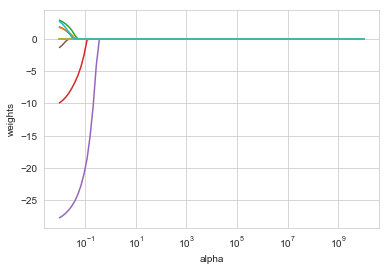

In [42]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

### The ouputs show that all the regression models shows have similar prediction results. 